In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from IPython.display import Image
#import pydotplus
from sklearn.tree import export_graphviz

import warnings; warnings.simplefilter('ignore')


from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [16]:
#read in survey data and drop misc. columns
surveyData = pd.read_csv("OSMI Mental Health in Tech Survey 2017.csv")
print(surveyData.shape)
surveyData = surveyData.drop(['#', '<strong>Do you have previous employers?</strong>', '<strong>Are you self-employed?</strong>', 'Network ID', 'Start Date (UTC)', 'Submit Date (UTC)'], axis = 1)
print(surveyData.shape)

#how many respondents answered all questions?
all_row = surveyData.dropna(axis=0)
print(all_row.shape)

#how many questions were answered by all respondents 
all_col = surveyData.dropna(axis=1)
print(all_col.shape)

surveyData.head()

(756, 123)
(756, 117)
(0, 117)
(756, 8)


How many employees does your company or organization have?  Is your employer primarily a tech company/organization?  Is your primary role within your company related to tech/IT? Does your employer provide mental health benefits as part of healthcare coverage? Do you know the options for mental health care available under your employer-provided health coverage? Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? Does your employer offer resources to learn more about mental health disorders and options for seeking help? Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? Would you feel more comfortable talking to your coworkers about your physical health or your mental health?  \
0                                            100-500                                                        1.0                                                      1.0                                                            No                                                                               Yes                                                                                                     No                                                                                                                           I don't know                                                                                                 I don't know                                                                                                                                   I don't know                                                                                                       Same level of comfort for each                                                            
1                                            100-500                                                        1.0                                                      1.0                                                           Yes                                                                               Yes                                                                                                     No                                                                                                                                     No                                                                                                 I don't know                                                                                                                                   I don't know                                                                                                       Same level of comfort for each                                                            
2                                               6-25                                                        1.0                                                      1.0                                                  I don't know                                                                                No                                                                                           I don't know                                                                                                                                     No                                                                                                          Yes                                                                                                                                      Difficult                                                                                                       Same level of comfort for each                                                            
3                 

In [11]:
#Get MH diagnosis names, use to make dataframe of only people who answered yes to at least one
MH_diag_names = ['Anxiety Disorder (Generalized, Social, Phobia, etc).1',
       'Mood Disorder (Depression, Bipolar Disorder, etc).1',
       'Eating Disorder (Anorexia, Bulimia, etc).1',
       'Attention Deficit Hyperactivity Disorder.1',
       'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
       'Obsessive-Compulsive Disorder.1',
       'Stress Response Syndromes.1', 'Dissociative Disorder.1',
       'Substance Use Disorder.1', 'Addictive Disorder.1',
       'Post-traumatic Stress Disorder.1']
MH_diag_df = surveyData[MH_diag_names]
MH_diag_df = MH_diag_df.dropna(axis = 0, thresh = 1)
MH_diag_df = MH_diag_df.fillna(value = 0)
print(MH_diag_df.shape)
MH_diag_df.head()

(198, 11)


Anxiety Disorder (Generalized, Social, Phobia, etc).1 Mood Disorder (Depression, Bipolar Disorder, etc).1 Eating Disorder (Anorexia, Bulimia, etc).1 Attention Deficit Hyperactivity Disorder.1 Personality Disorder (Borderline, Antisocial, Paranoid, etc).1 Obsessive-Compulsive Disorder.1 Stress Response Syndromes.1 Dissociative Disorder.1 Substance Use Disorder.1 Addictive Disorder.1 Post-traumatic Stress Disorder.1
0   Anxiety Disorder (Generalized, Social, Phobia,...                                                     0                                           0                                          0                                                  0                                           0                           0                       0                        0                    0                                0
1                                                   0     Mood Disorder (Depression, Bipolar Disorder, etc)                                           0                                          0                                                  0                                           0                           0                       0                        0                    0                                0
9                                                   0                                                     0                                           0   Attention Deficit Hyperactivity Disorder                                                  0                                           0                           0                       0                        0                    0                                0
11                                                  0                                                     0                                           0                                          0                                                  0                                           0                           0                       0                        0                    0   Post-traumatic Stress Disorder
14                                                  0                                                     0                                           0                                          0                                                  0                                           0                           0                       0                        0                    0   Post-traumatic Stress Disorder

In [34]:
#get index of respondents that answerd yes to at least one MH diagnosis and create new data table with only these respondents
surveyData_MH = surveyData.iloc[MH_diag_df.index.values]
print(surveyData_MH.shape)
surveyData_MH = surveyData_MH.dropna(axis = 1, thresh = 1)
print(surveyData_MH.shape)
surveyData_MH.head()

(198, 117)
(198, 102)


How many employees does your company or organization have?  Is your employer primarily a tech company/organization?  Is your primary role within your company related to tech/IT? Does your employer provide mental health benefits as part of healthcare coverage? Do you know the options for mental health care available under your employer-provided health coverage? Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? Does your employer offer resources to learn more about mental health disorders and options for seeking help? Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? Would you feel more comfortable talking to your coworkers about your physical health or your mental health?  \
0                                             100-500                                                        1.0                                                      1.0                                                            No                                                                               Yes                                                                                                     No                                                                                                                           I don't know                                                                                                 I don't know                                                                                                                                   I don't know                                                                                                       Same level of comfort for each                                                            
1                                             100-500                                                        1.0                                                      1.0                                                           Yes                                                                               Yes                                                                                                     No                                                                                                                                     No                                                                                                 I don't know                                                                                                                                   I don't know                                                                                                       Same level of comfort for each                                                            
9                                                 NaN                                                        NaN                                                      NaN                                                           NaN                                                                               NaN                                                                                                    NaN                                                                                                                                    NaN                                                                                                          NaN                                                                                                                                            NaN                                                                                                                                  NaN                                                            
11             

In [15]:
#Sort questions by how many people answered each
surveyData_counts_sorted = surveyData.count(axis = 0).sort_values()
print(surveyData_counts_sorted.shape)
surveyData_MH_counts_sorted = surveyData_MH.count(axis = 0).sort_values()
print(surveyData_MH_counts_sorted.shape)

(117,)
(102,)


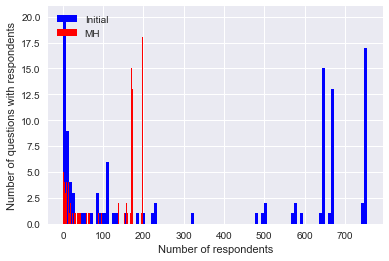

In [28]:
#look at how many respondents answered each question
surveyData_resp_counts_sorted.hist(bins = 100, color="blue", label = 'Initial')
plt.xlabel('Number of respondents')
plt.ylabel('Number of questions with respondents')
plt.legend(loc='upper left')

#visualize new data set
surveyData_MH_counts_sorted.hist(bins = 100, color="red", label = 'MH')
plt.legend(loc='upper left')

In [30]:
#remove questions with free answer format
why = surveyData_MH.filter(like='Why', axis=1).columns.values
briefly  = surveyData_MH.filter(like='Briefly', axis=1).columns.values
describe  = surveyData_MH.filter(like='describe', axis=1).columns.values
previous  = surveyData_MH.filter(like='previous', axis=1).columns.values
surveyData_MH.drop(why, inplace=True, axis=1)
surveyData_MH.drop(briefly, inplace=True, axis=1)
surveyData_MH.drop(describe, inplace=True, axis=1)
surveyData_MH.drop(previous, inplace=True, axis=1)
print(surveyData_MH.shape)

(198, 78)


In [31]:
surveyData_MH_cont = surveyData_MH.select_dtypes(include=['float', 'int']).copy()
print(surveyData_MH_cont.shape)

surveyData_MH_cont.head()

(198, 16)


Is your employer primarily a tech company/organization?  Is your primary role within your company related to tech/IT?  Have you ever discussed your mental health with your employer?  Have you ever discussed your mental health with coworkers?  Have you ever had a coworker discuss their or another coworker's mental health with you?  Overall, how much importance does your employer place on physical health?  Overall, how much importance does your employer place on mental health?  Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?  Was your employer primarily a tech company/organization?  Are you openly identified at work as a person with a mental health issue?  Has being identified as a person with a mental health issue affected your career?  How has it affected your career?  If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?  \
0                                                 1.0                                                      1.0                                                           0.0                                                             1.0                                                         1.0                                                                                       6.0                                                                        0.0                                                                      NaN                                                                                                                     0.0                                                       0.0                                                                        NaN                                                               NaN                                               10.0                                                                     
1                                                 1.0                                                      1.0                                                           0.0                                                             1.0                                                         1.0                                                                                       7.0                                                                        2.0                                                                      NaN                                                                                                                     1.0                                                       0.0                                                                        NaN                                                               NaN                                                6.0                                                                     
9                                                 NaN                                                      NaN                                                           NaN                                                             NaN                                                         NaN                                                                                       NaN                                                                        NaN                                                                      1.0                                                                                                                     1.0                                                       1.0                                                                        1.0                                                               2.0                                                4.0                                                                     
11                                                1.0                                                      1

In [43]:
surveyData_MH_cont_columns = surveyData_MH_cont.columns.values
surveyData_MH_cont_columns

array(['Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Have you ever discussed your mental health with your employer?',
       'Have you ever discussed your mental health with coworkers?',
       "Have you ever had a coworker discuss their or another coworker's mental health with you?",
       'Overall, how much importance does your employer place on physical health?',
       'Overall, how much importance does your employer place on mental health?',
       'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
       'Was your employer primarily a tech company/organization?',
       'Are you openly identified at work as a person with a mental health issue?',
       'Has being identified as a person with a mental health issue affected your career?',
       'How has it affected your career?',
       'If they knew you suffered from a 

In [46]:
surveyData_MH_cont_columns_short = [
'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Have you ever discussed your mental health with your employer?',
       'Have you ever discussed your mental health with coworkers?',
        'Overall, how much importance does your employer place on physical health?',
       'Overall, how much importance does your employer place on mental health?',
       'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
        'Are you openly identified at work as a person with a mental health issue?',
       'Overall, how well do you think the tech industry supports employees with mental health issues?',
     'What is your age?'

In [47]:
surveyData_MH_cont_columns_ab = ['Tech company?','Tech/IT role?','Discussed MH with employer?',
        'Discussed MH with coworkers?','Employer physical health?','Employer mental health?','MH coverage?',
       'Openly identified mental health issue?',
       'Tech MH support?',
       'Age?']

In [52]:
MH_cont= pd.DataFrame()
i = 0
for name in surveyData_MH_cont_columns_short: 
    MH_cont[surveyData_MH_cont_columns_ab[i]] = surveyData_MH[name]
    i = i + 1

print(MH_cont.shape)
MH_cont.head()

(198, 10)


Tech company?  Tech/IT role?  Discussed MH with employer?  Discussed MH with coworkers?  Employer physical health?  Employer mental health?  MH coverage?  Openly identified mental health issue?  Tech MH support?  Age?
0             1.0            1.0                          0.0                           1.0                        6.0                      0.0           NaN                                     0.0               1.0  27.0
1             1.0            1.0                          0.0                           1.0                        7.0                      2.0           NaN                                     0.0               2.0  31.0
9             NaN            NaN                          NaN                           NaN                        NaN                      NaN           1.0                                     1.0               3.0  36.0
11            1.0            1.0                          0.0                           0.0                        5.0                      3.0           NaN                                     0.0               1.0  35.0
14            1.0            0.0                          1.0                           1.0                        5.0                      5.0           NaN                                     0.0               3.0  34.0

In [66]:
surveyData_MH_cat = surveyData_MH.select_dtypes(include=['object']).copy()
surveyData_MH_cat = surveyData_MH_cat.fillna(value =0)
surveyData_MH_cat.head()

How many employees does your company or organization have? Does your employer provide mental health benefits as part of healthcare coverage? Do you know the options for mental health care available under your employer-provided health coverage? Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)? Does your employer offer resources to learn more about mental health disorders and options for seeking help? Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? Would you feel more comfortable talking to your coworkers about your physical health or your mental health? Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?  \
0                                             100-500                                                         No                                                                               Yes                                                                                                     No                                                                                                                           I don't know                                                                                                 I don't know                                                                                                                                   I don't know                                                                                                       Same level of comfort for each                                                                                                         Yes                                            
1                                             100-500                                                        Yes                                                                               Yes                                                                                                     No                                                                                                                                     No                                                                                                 I don't know                                                                                                                                   I don't know                                                                                                       Same level of comfort for each                                                                                                       Maybe                                            
9                                                   0                                                          0                                                                                 0                                                                                                      0                                                                                                                                      0                                                                                                            0                                                                                                                                              0                                                                                                                                    0                                                                                                           0                                            
11                                            100-500                                               I don't know           

In [54]:
surveyData_MH_cat_columns = surveyData_MH_cat.columns.values
surveyData_MH_cat_columns

array(['How many employees does your company or organization have?',
       'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
       'Would you feel comfortable discussing

In [58]:
cat_names_short = ['Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
       'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
       'Would you feel comfortable discussing a mental health issue with your coworkers?',
       'Have you ever been diagnosed with a mental health disorder?',
       'Do you have a family history of mental illness?',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
       'Would you bring up your mental health with a potential employer in an interview?', 'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
       'Mood Disorder (Depression, Bipolar Disorder, etc).1',
       'Eating Disorder (Anorexia, Bulimia, etc).1',
       'Attention Deficit Hyperactivity Disorder.1',
       'Personality Disorder (Borderline, Antisocial, Paranoid, etc).1',
       'Obsessive-Compulsive Disorder.1', 'Post-traumatic Stress Disorder.1',
       'Stress Response Syndromes.1', 'Dissociative Disorder.1',
       'Substance Use Disorder.1', 'Addictive Disorder.1']
cat_names_ab = ['Benefits?',
       'Difficulty asking for MH leave?',
       'Talk physical health or your mental health?',
       'Suppervisor MH chat comfort?',
       'Coworker MH chat comfort',
       'MH diagnosis ever?',
       'Family history?',
       'Physical health in interview?',
       'Mental health in interview?', 'Anxiety Disorder',
       'Mood Disorder',
       'Eating Disorder',
       'ADHD',
       'Personality Disorder',
       'OCD',
                'PTSD',
       'Stress Response Syndromes', 'Dissociative Disorder',
       'Substance Use Disorder', 'Addictive Disorder']

In [67]:
MH_cat= pd.DataFrame()
i = 0
for name in cat_names_short: 
    temp = surveyData_MH_cat[name].astype('category', ordered=True).cat.codes
    MH_cat[cat_names_ab[i]] = temp
    i = i + 1

print(MH_cat.shape)
MH_cat.head()

(198, 20)


Benefits?  Difficulty asking for MH leave?  Talk physical health or your mental health?  Suppervisor MH chat comfort?  Coworker MH chat comfort  MH diagnosis ever?  Family history?  Physical health in interview?  Mental health in interview?  Anxiety Disorder  Mood Disorder  Eating Disorder  ADHD  Personality Disorder  OCD  PTSD  Stress Response Syndromes  Dissociative Disorder  Substance Use Disorder  Addictive Disorder
0           2                                2                                            3                             3                         3                   0                1                              2                            1                 1              0                0     0                     0    0     0                          0                      0                       0                   0
1           4                                2                                            3                             1                         3                   0                1                              2                            1                 0              1                0     0                     0    0     0                          0                      0                       0                   0
9           0                                0                                            0                             0                         0                   0                1                              0                            1                 0              0                0     1                     0    0     0                          0                      0                       0                   0
11          1                                1                                            2                             1                         2                   1                2                              1                            1                 0              0                0     0                     0    0     1                          0                      0                       0                   0
14          1                                6                                            3                             1                         3                   1                2                              2                            1                 0              0                0     0                     0    0     1                          0                      0                       0                   0

In [72]:
surveyData_MH.shape

(198, 102)

In [87]:
surveyData_MH_final = surveyData_MH.copy()
print(surveyData_MH_final.shape)
surveyData_MH_final['Gender_old'] = surveyData_MH['What is your gender?']
print(surveyData_MH_final.Gender_old.value_counts())
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].fillna(value = 0)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[f].*', 'F', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[w].*', 'F', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[md][^y].*', 'M', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[ngau][egho][nhe].*', 'NB', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[c][i][s].{1,2}[mh].*', 'M', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[c][i][s].{1,2}[f].*', 'F', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[t].*', 'T', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('^[sgcm][yo][ nmd].*', '0', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('\\\-', '0', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('n/a', '0', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].str.replace('m', 'M', case=False)
surveyData_MH_final['What is your gender?'] = surveyData_MH_final['What is your gender?'].fillna(value=0)
surveyData_MH_final['What is your gender?'].value_counts()

(198, 102)
Male                           69
Female                         35
male                           27
female                         16
m                               8
M                               7
f                               3
Woman                           2
F                               2
Male                            2
Female                          1
Transfeminine                   1
My sex is female.               1
cis female                      1
None                            1
dude                            1
Male, cis                       1
cis-Female                      1
n/a                             1
\-                              1
Nonbinary                       1
male/androgynous                1
Cis-male                        1
Genderfluid                     1
cis-male                        1
nonbinary                       1
uhhhhhhhhh fem genderqueer?     1
female (cisgender)              1
Female-ish                      1
Mal

M     119
F      65
NB      6
0       4
0       3
T       1
Name: What is your gender?, dtype: int64

In [94]:
size = surveyData_MH_final['How many employees does your company or organization have?']
size = size.fillna('NaN')
size_cont = []
for i, row in size.iteritems():
    if row == '6-25':
        size = 15
        size_cont.append(size)
    if row == '100-500':
        size = 250
        size_cont.append(size)
    if row == 'NaN':
        size = None
        size_cont.append(size)
    if row == '26-100':
        size = 75
        size_cont.append(size)
    if row == '500-1000':
        size = 750
        size_cont.append(size)
    if row == 'More than 1000':
        size = 1000
        size_cont.append(size)
    if row == '1-5':
        size = 3
        size_cont.append(size)

len(size_cont)

surveyData_MH_final['Org_size'] = size_cont
print(surveyData_MH_final['Org_size'].unique())
print(surveyData_MH_final['Org_size'].value_counts())
surveyData_MH_final['Org_size']

[  250.    nan    75.    15.   750.  1000.     3.]
250.0     58
1000.0    43
75.0      27
15.0      24
750.0     11
3.0        7
Name: Org_size, dtype: int64


0       250.0
1       250.0
9         NaN
11      250.0
14       75.0
16       75.0
18       15.0
20       15.0
21      250.0
22       75.0
27      250.0
29        NaN
39      250.0
42      750.0
43      250.0
46     1000.0
48       15.0
51       15.0
54      750.0
56        NaN
71     1000.0
74      250.0
75       75.0
80      250.0
87     1000.0
90      250.0
91       75.0
92      250.0
96        3.0
102      75.0
109       NaN
111      15.0
113    1000.0
116    1000.0
125     250.0
128    1000.0
135       NaN
136      75.0
138       3.0
140    1000.0
143    1000.0
144    1000.0
147     750.0
152    1000.0
154     750.0
155    1000.0
159     250.0
160    1000.0
163    1000.0
164       NaN
166     750.0
167      15.0
173      15.0
176      75.0
187       NaN
192     250.0
196      75.0
200     250.0
205    1000.0
207    1000.0
210     250.0
225       NaN
226    1000.0
227      15.0
229      15.0
233     250.0
238      75.0
239     250.0
242      75.0
247      75.0
254     250.0
259   

In [90]:
print(surveyData_MH_final["What is your gender?"].unique())
ordered_gender = [0, 1, 'T', 'NB', 'F', 'M']
surveyData_MH_final['Gender_cat'] = surveyData_MH_final["What is your gender?"].astype('category', ordered=True,
  categories=ordered_gender).cat.codes
print(surveyData_MH_final['Gender_cat'].unique())
print(surveyData_MH_final['Gender_cat'].value_counts())

['F' 'M' 'NB' '0' 0 'T']
[ 4  5  3 -1  0  2]
 5    119
 4     65
 3      6
-1      4
 0      3
 2      1
Name: Gender_cat, dtype: int64


In [91]:
print(surveyData_MH_final["Do you currently have a mental health disorder?"].unique())
ordered_MH = ['No', 'Don\'t know', 'Possibly', 'Yes']
surveyData_MH_final['MH_status'] = surveyData_MH_final["Do you currently have a mental health disorder?"].astype('category', ordered=True,
  categories=ordered_MH).cat.codes
print(surveyData_MH_final['MH_status'].unique())
print(surveyData_MH_final['MH_status'].value_counts())

['Possibly' 'Yes']
[2 3]
2    140
3     58
Name: MH_status, dtype: int64


In [99]:
surveyData_trans = surveyData_MH_final[['Org_size', 'What is your age?', 'MH_status', 'Gender_cat']]
print(surveyData_trans.shape)
surveyData_trans.head()

(198, 4)


Org_size  What is your age?  MH_status  Gender_cat
0      250.0               27.0          2           4
1      250.0               31.0          2           5
9        NaN               36.0          2           5
11     250.0               35.0          3           5
14      75.0               34.0          3           4

In [102]:
frames = [surveyData_trans, MH_cat, MH_cont]
MH_df = pd.concat(frames, axis = 1)
print(MH_df.shape)
MH_df.head()

(198, 34)


Org_size  What is your age?  MH_status  Gender_cat  Benefits?  Difficulty asking for MH leave?  Talk physical health or your mental health?  Suppervisor MH chat comfort?  Coworker MH chat comfort  MH diagnosis ever?  Family history?  Physical health in interview?  Mental health in interview?  Anxiety Disorder  Mood Disorder  Eating Disorder  ADHD  Personality Disorder  OCD  PTSD  Stress Response Syndromes  Dissociative Disorder  Substance Use Disorder  Addictive Disorder  Tech company?  Tech/IT role?  Discussed MH with employer?  Discussed MH with coworkers?  Employer physical health?  Employer mental health?  MH coverage?  Openly identified mental health issue?  Tech MH support?  Age?
0      250.0               27.0          2           4          2                                2                                            3                             3                         3                   0                1                              2                            1                 1              0                0     0                     0    0     0                          0                      0                       0                   0            1.0            1.0                          0.0                           1.0                        6.0                      0.0           NaN                                     0.0               1.0  27.0
1      250.0               31.0          2           5          4                                2                                            3                             1                         3                   0                1                              2                            1                 0              1                0     0                     0    0     0                          0                      0                       0                   0            1.0            1.0                          0.0                           1.0                        7.0                      2.0           NaN                                     0.0               2.0  31.0
9        NaN               36.0          2           5          0                                0                                            0                             0                         0                   0                1                              0                            1                 0              0                0     1                     0    0     0                          0                      0                       0                   0            NaN            NaN                          NaN                           NaN                        NaN                      NaN           1.0                                     1.0               3.0  36.0
11     250.0               35.0          3           5          1                                1                                            2                             1                         2                   1                2                              1                            1                 0              0                0     0                     0    0     1                          0                      0                       0                   0            1.0            1.0                          0.0                           0.0                        5.0                      3.0           NaN                                     0.0               1.0  35.0
14      75.0               34.0          3           4          1                                6                                            3                             1                         3                   1                2                              2                            1                 0              0                0     0                     0    0     1                          0                      0                       0                   0            1.0            0.0

In [178]:
final_unsuper = MH_df.dropna(axis = 1, thresh = 198).copy()
print(final_unsuper.shape)
final_unsuper = final_unsuper.dropna(axis = 0, thresh = 26)
print(final_unsuper.shape)
final_unsuper = final_unsuper[final_unsuper['Gender_cat'] > -1]
final_unsuper = final_unsuper.drop(['Openly identified mental health issue?', 'What is your age?'], axis = 1)
print(final_unsuper.shape)

(198, 26)
(198, 26)
(194, 25)


In [180]:
auto_correlations = final_unsuper.corr()
auto_correlations

What is your age?  MH_status  Gender_cat  Benefits?  Difficulty asking for MH leave?  Talk physical health or your mental health?  Suppervisor MH chat comfort?  Coworker MH chat comfort  MH diagnosis ever?  Family history?  Physical health in interview?  Mental health in interview?  Anxiety Disorder  Mood Disorder  Eating Disorder      ADHD  Personality Disorder       OCD      PTSD  Stress Response Syndromes  Dissociative Disorder  Substance Use Disorder  Addictive Disorder  Tech MH support?      Age?
What is your age?                                     1.000000   0.090949    0.096191   0.085875                        -0.104225                                    -0.083607                     -0.049790                 -0.154251            0.090949        -0.053672                      -0.117316                     0.029816         -0.051565      -0.089238        -0.030487 -0.028174              0.012892  0.044847  0.090949                  -0.123759              -0.077520                0.154841           -0.005705         -0.058707  1.000000
MH_status                                             0.090949   1.000000   -0.255911   0.151053                         0.041638                                    -0.009170                     -0.004834                  0.070225            1.000000         0.245099                       0.049338                     0.110433         -0.622582      -0.573142        -0.064200 -0.263713             -0.175429 -0.194945  1.000000                  -0.168580              -0.091270               -0.130456           -0.121703         -0.089171  0.090949
Gender_cat                                            0.096191  -0.255911    1.000000  -0.216239                        -0.183776                                    -0.090335                     -0.103394                 -0.161445           -0.255911        -0.044171                      -0.116208                    -0.042817          0.063974       0.103775         0.061898  0.164735              0.095124  0.052487 -0.255911                   0.060408              -0.136626                0.093671            0.083108         -0.006499  0.096191
Benefits?                                             0.085875   0.151053   -0.216239   1.000000                         0.456365                                     0.567777                      0.351760                  0.378249            0.151053         0.070410                      -0.061607                     0.073903          0.025065      -0.173941        -0.057109 -0.085773             -0.019346 -0.031247  0.151053                  -0.040639              -0.058559               -0.067527           -0.151369          0.126555  0.085875
Difficulty asking for MH leave?                      -0.104225   0.041638   -0.183776   0.456365                         1.000000                                     0.626855                      0.517622                  0.508020            0.041638         0.031444                       0.049892                    -0.005698          0.045854      -0.088406        -0.032075 -0.068262              0.107911 -0.026752  0.041638                  -0.036291               0.010627                0.001795           -0.110785          0.276349 -0.104225
Talk physical health or your mental health?          -0.083607  -0.009170   -0.090335   0.567777                         0.626855                                     1.000000                      0.621826                  0.679490           -0.009170        -0.009046                       0.040935                     0.005759          0.022122      -0.072262         0.004610 -0.076078             -0.009224 -0.085850 -0.009170                  -0.055642               0.086025               -0.075825           -0.172924          0.130702 -0.083607
Suppervisor MH chat comfort?                         -0.049790  -0.004834   -0.103394   0.351760                         0.517622                                     0.621826       

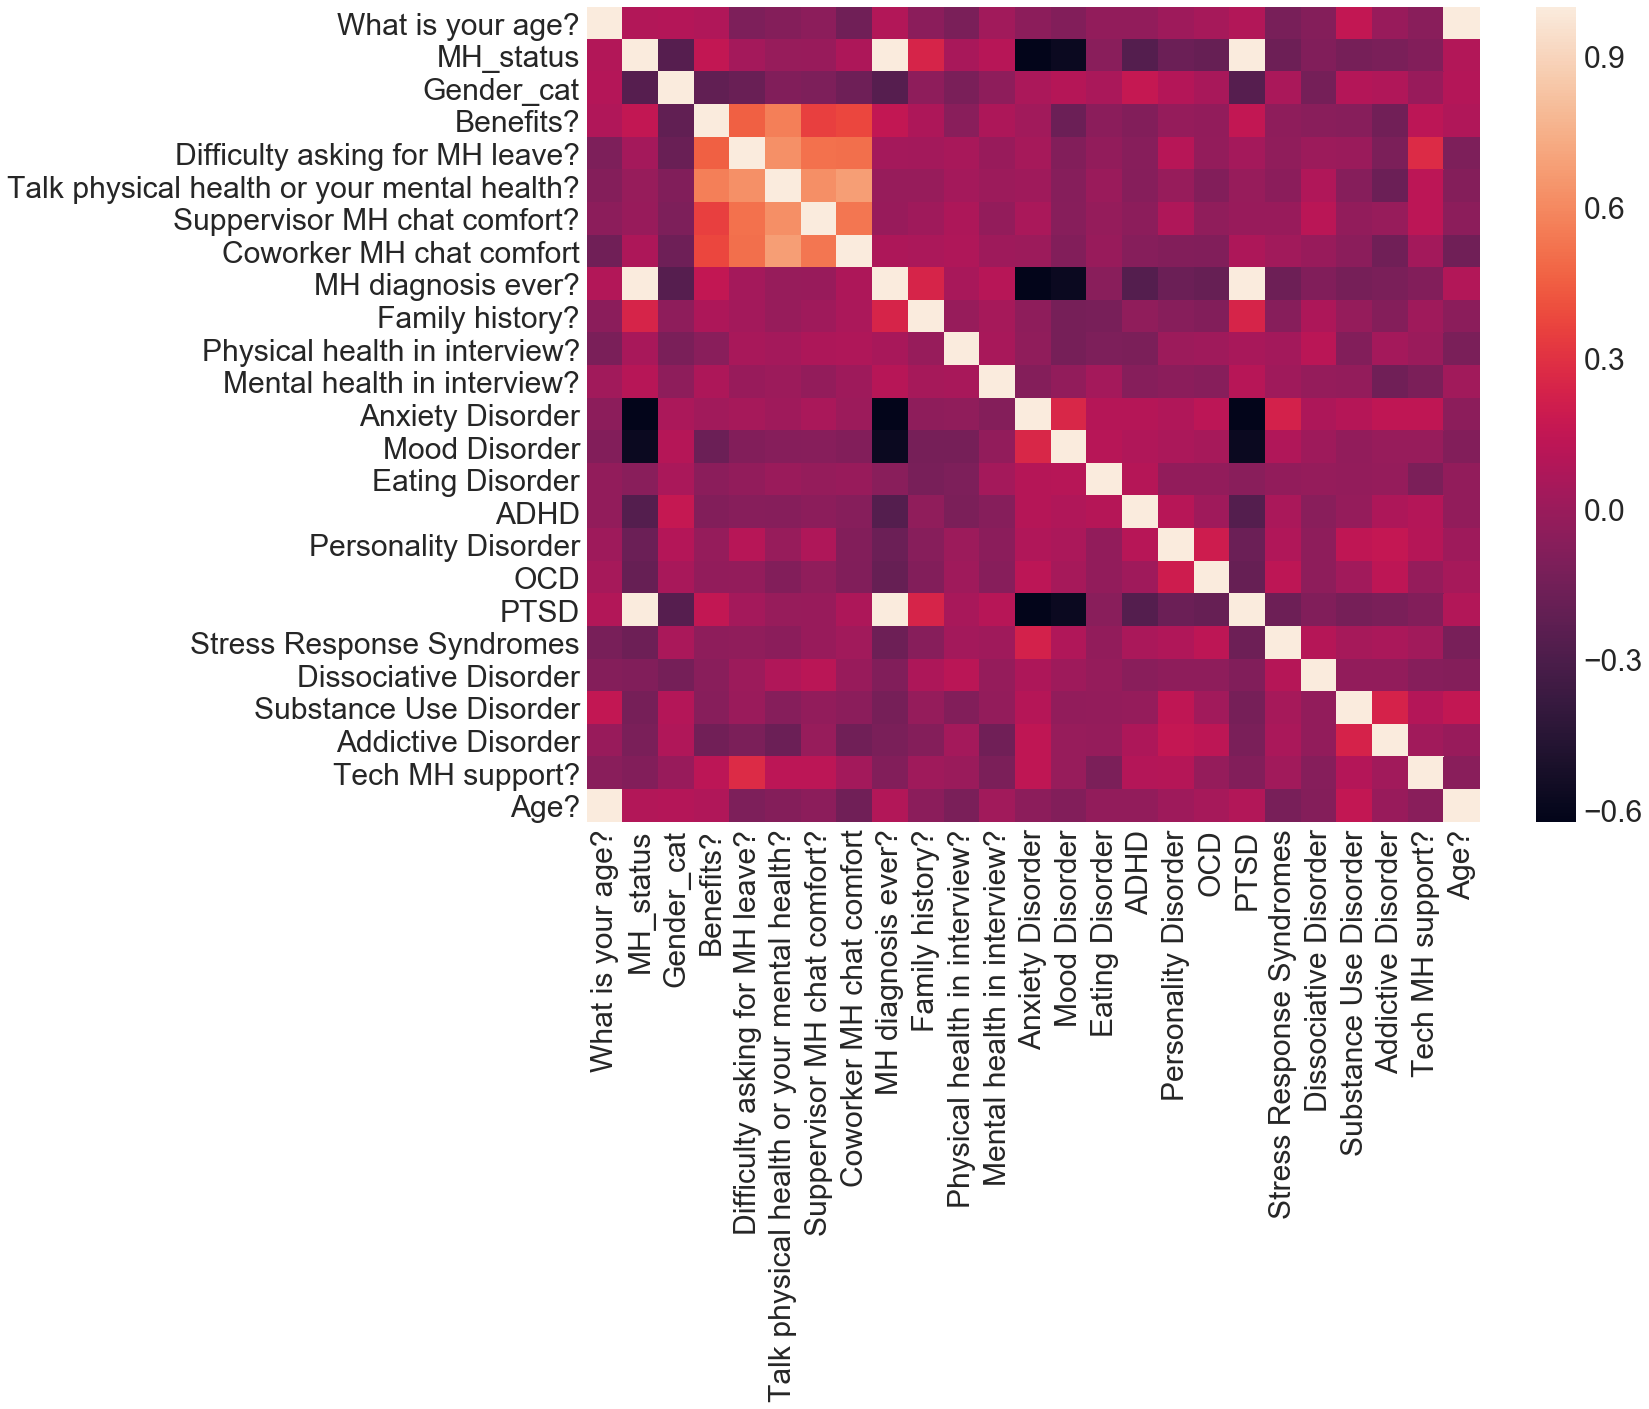

In [189]:
sns.set(font_scale=3)
plt.subplots(figsize=(20,15))
sns.heatmap(auto_correlations)

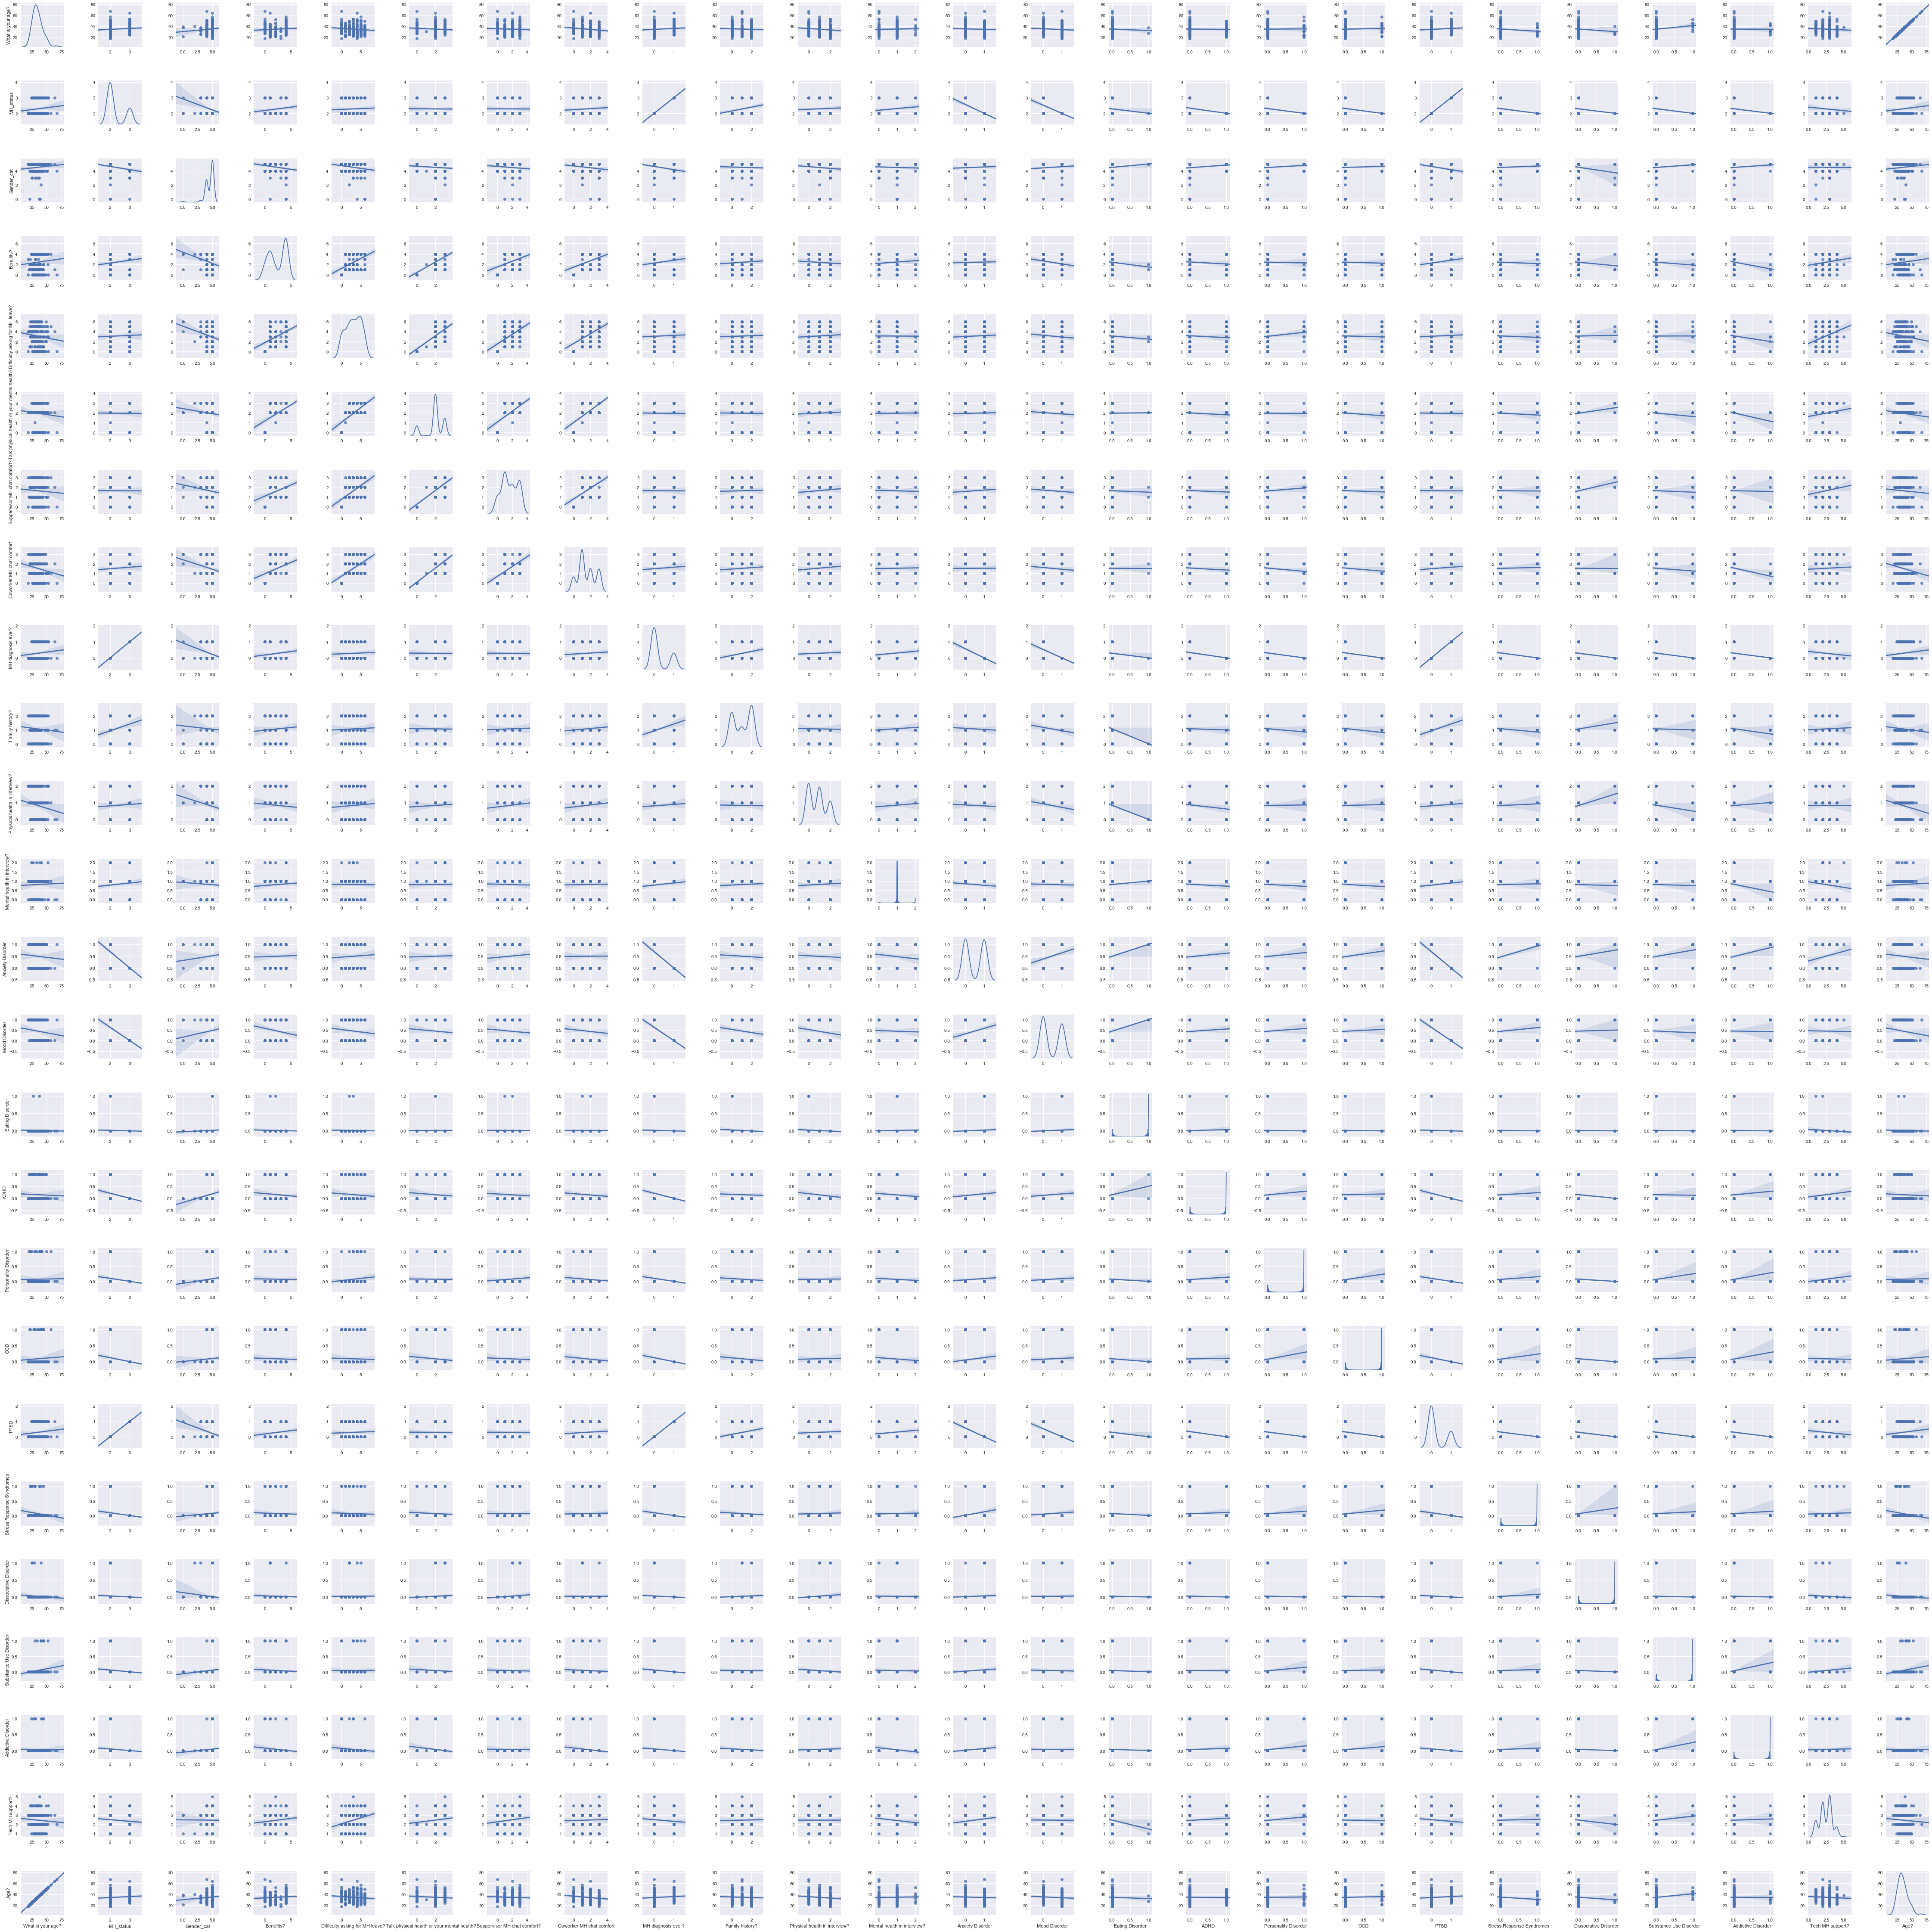

In [195]:
sns.set(font_scale=1)
#plt.subplots(figsize=(20,15))
sns.pairplot(final_unsuper, diag_kind = 'kde', kind = 'reg')

In [196]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer
import numpy as np
from sklearn.metrics.cluster import silhouette_score

Text(0,0.5,'Silhouette Coefficient')

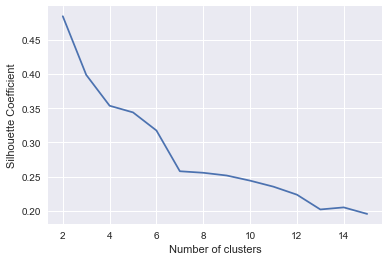

In [197]:
k_range = range(2,16)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(final_unsuper)
    scores.append(silhouette_score(final_unsuper, km_ss.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [199]:
# center and scale the data
scaler = StandardScaler()
# use .fit_transform()
final_unsuper_scaled = scaler.fit_transform(final_unsuper)
# create and display data frames
final_unsuper_scaled = pd.DataFrame(final_unsuper_scaled, columns = final_unsuper.columns.values)
print("Before scaling:\n", final_unsuper.describe())
print("\nAfter scaling:\n", np.round(final_unsuper_scaled.describe(),2))

Before scaling:
        What is your age?   MH_status  Gender_cat   Benefits?  Difficulty asking for MH leave?  Talk physical health or your mental health?  Suppervisor MH chat comfort?  Coworker MH chat comfort  MH diagnosis ever?  Family history?  Physical health in interview?  Mental health in interview?  Anxiety Disorder  Mood Disorder  Eating Disorder        ADHD  Personality Disorder         OCD        PTSD  Stress Response Syndromes  Dissociative Disorder  Substance Use Disorder  Addictive Disorder  Tech MH support?        Age?
count         194.000000  194.000000  194.000000  194.000000                       194.000000                                   194.000000                    194.000000                194.000000          194.000000       194.000000                     194.000000                   194.000000        194.000000     194.000000       194.000000  194.000000            194.000000  194.000000  194.000000                 194.000000             194.000000          

Text(0,0.5,'Silhouette Coefficient')

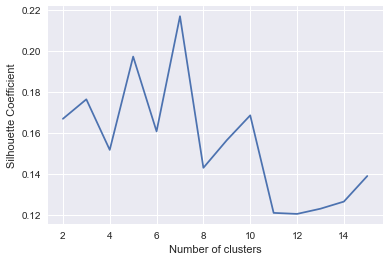

In [200]:
k_range = range(2,16)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(final_unsuper_scaled)
    scores.append(silhouette_score(final_unsuper_scaled, km_ss.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [207]:
final_unsuper_scaled.head()

What is your age?  MH_status  Gender_cat  Benefits?  Difficulty asking for MH leave?  Talk physical health or your mental health?  Suppervisor MH chat comfort?  Coworker MH chat comfort  MH diagnosis ever?  Family history?  Physical health in interview?  Mental health in interview?  Anxiety Disorder  Mood Disorder  Eating Disorder      ADHD  Personality Disorder       OCD      PTSD  Stress Response Syndromes  Dissociative Disorder  Substance Use Disorder  Addictive Disorder  Tech MH support?      Age?   kmeans_2
0          -0.887620  -0.629034   -0.632011  -0.247619                        -0.572601                                     1.140606                      1.307810                  1.488211           -0.629034        -0.081264                       1.504235                     0.410175          1.010363      -0.911147        -0.102062 -0.419235             -0.278887 -0.309912 -0.629034                  -0.267999              -0.145095                -0.20739           -0.193476         -1.631066 -0.887620  cluster_2
1          -0.416489  -0.629034    0.606475   1.000124                        -0.572601                                     1.140606                     -0.621583                  1.488211           -0.629034        -0.081264                       1.504235                     0.410175         -0.989743       1.097518        -0.102062 -0.419235             -0.278887 -0.309912 -0.629034                  -0.267999              -0.145095                -0.20739           -0.193476         -0.508985 -0.416489  cluster_8
2           0.172424  -0.629034    0.606475  -1.495362                        -1.605946                                    -2.145694                     -1.586280                 -1.540247           -0.629034        -0.081264                      -1.066880                     0.410175         -0.989743      -0.911147        -0.102062  2.385300             -0.278887 -0.309912 -0.629034                  -0.267999              -0.145095                -0.20739           -0.193476          0.613096  0.172424  cluster_1
3           0.054641   1.589740    0.606475  -0.871491                        -1.089273                                     0.045173                     -0.621583                  0.478725            1.589740         1.044818                       0.218677                     0.410175         -0.989743      -0.911147        -0.102062 -0.419235             -0.278887 -0.309912  1.589740                  -0.267999              -0.145095                -0.20739           -0.193476         -1.631066  0.054641  cluster_4
4          -0.063141   1.589740   -0.632011  -0.871491                         1.494089                                     1.140606                     -0.621583                  1.488211            1.589740         1.044818                       1.504235                     0.410175         -0.989743      -0.911147        -0.102062 -0.419235             -0.278887 -0.309912  1.589740                  -0.267999              -0.145095                -0.20739           -0.193476          0.613096 -0.063141  cluster_3

In [209]:
final_unsuper_scaled = final_unsuper_scaled.drop(["kmeans_2"], axis = 1)

In [210]:
kmeans = KMeans(n_clusters=7,random_state=1234)
kmeans.fit(final_unsuper_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [211]:
# create a column that contains the cluster identification for each observation
final_unsuper_scaled["kmeans_7"] = ["cluster_"+str(label) for label in kmeans.labels_]
# return the data types and view new dataframe
print(final_unsuper_scaled.dtypes)
print(final_unsuper_scaled.head())
final_unsuper_scaled.tail()

What is your age?                              float64
MH_status                                      float64
Gender_cat                                     float64
Benefits?                                      float64
Difficulty asking for MH leave?                float64
Talk physical health or your mental health?    float64
Suppervisor MH chat comfort?                   float64
Coworker MH chat comfort                       float64
MH diagnosis ever?                             float64
Family history?                                float64
Physical health in interview?                  float64
Mental health in interview?                    float64
Anxiety Disorder                               float64
Mood Disorder                                  float64
Eating Disorder                                float64
ADHD                                           float64
Personality Disorder                           float64
OCD                                            float64
PTSD      

What is your age?  MH_status  Gender_cat  Benefits?  Difficulty asking for MH leave?  Talk physical health or your mental health?  Suppervisor MH chat comfort?  Coworker MH chat comfort  MH diagnosis ever?  Family history?  Physical health in interview?  Mental health in interview?  Anxiety Disorder  Mood Disorder  Eating Disorder      ADHD  Personality Disorder       OCD      PTSD  Stress Response Syndromes  Dissociative Disorder  Substance Use Disorder  Addictive Disorder  Tech MH support?      Age?   kmeans_7
189           0.996903  -0.629034   -0.632011   1.000124                         0.460744                                     0.045173                      0.343114                 -0.530761           -0.629034        -1.207345                      -1.066880                     0.410175          1.010363       1.097518        -0.102062 -0.419235             -0.278887 -0.309912 -0.629034                  -0.267999              -0.145095                -0.20739           -0.193476          0.613096  0.996903  cluster_5
190          -0.416489   1.589740   -0.632011   1.000124                        -1.089273                                     0.045173                     -0.621583                 -0.530761            1.589740         1.044818                       0.218677                     0.410175         -0.989743      -0.911147        -0.102062 -0.419235             -0.278887 -0.309912  1.589740                  -0.267999              -0.145095                -0.20739           -0.193476          0.613096 -0.416489  cluster_1
191           0.996903  -0.629034    0.606475  -1.495362                        -1.605946                                    -2.145694                     -1.586280                 -1.540247           -0.629034         1.044818                      -1.066880                     0.410175         -0.989743       1.097518        -0.102062  2.385300             -0.278887 -0.309912 -0.629034                  -0.267999              -0.145095                -0.20739           -0.193476         -0.508985  0.996903  cluster_6
192           0.407989  -0.629034    0.606475  -0.871491                        -1.089273                                     0.045173                      0.343114                 -0.530761           -0.629034        -0.081264                       1.504235                     0.410175         -0.989743       1.097518        -0.102062 -0.419235             -0.278887 -0.309912 -0.629034                  -0.267999              -0.145095                -0.20739           -0.193476         -1.631066  0.407989  cluster_2
193          -0.534272  -0.629034    0.606475   1.000124                         1.494089                                     0.045173                      1.307810                  0.478725           -0.629034        -0.081264                      -1.066880                     0.410175          1.010363      -0.911147        -0.102062  2.385300             -0.278887 -0.309912 -0.629034                  -0.267999              -0.145095                -0.20739           -0.193476         -0.508985 -0.534272  cluster_2

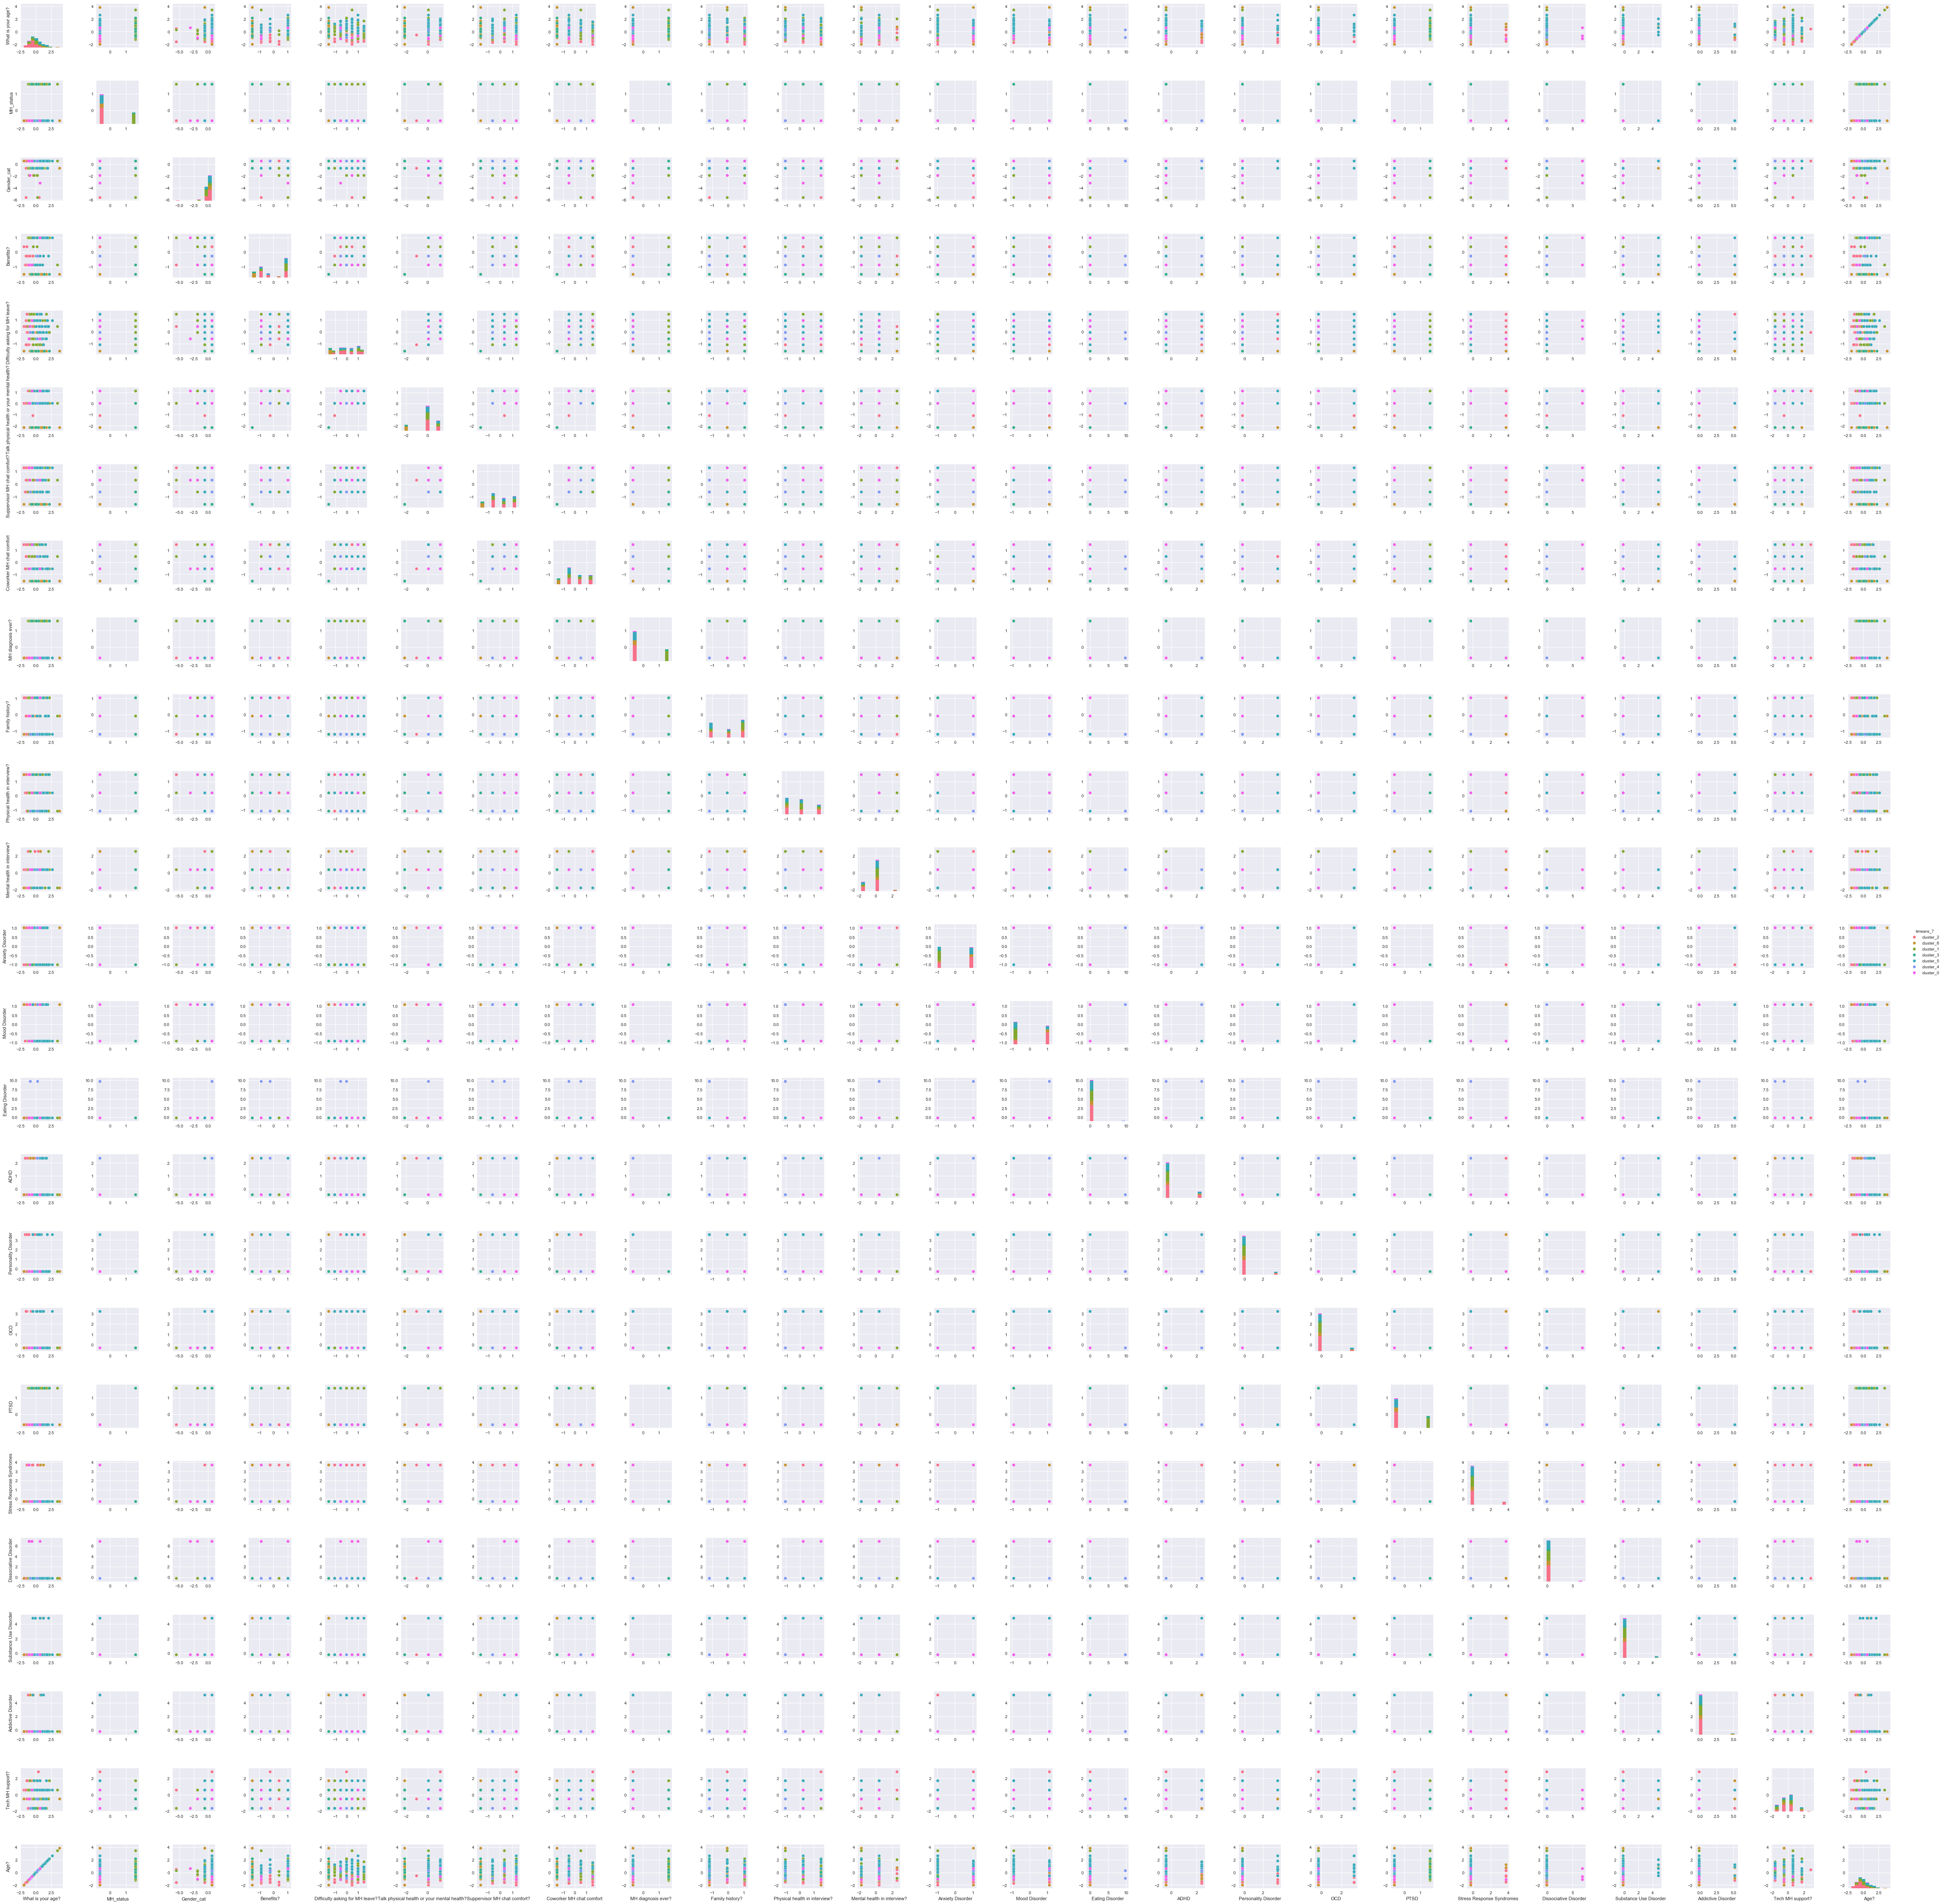

In [212]:
# plot the pairs plots, but use the kmeans_2 column to differentiate by color
sns.pairplot(final_unsuper_scaled,hue="kmeans_7")

In [213]:
final_unsuper.columns.values

array(['What is your age?', 'MH_status', 'Gender_cat', 'Benefits?',
       'Difficulty asking for MH leave?',
       'Talk physical health or your mental health?',
       'Suppervisor MH chat comfort?', 'Coworker MH chat comfort',
       'MH diagnosis ever?', 'Family history?',
       'Physical health in interview?', 'Mental health in interview?',
       'Anxiety Disorder', 'Mood Disorder', 'Eating Disorder', 'ADHD',
       'Personality Disorder', 'OCD', 'PTSD', 'Stress Response Syndromes',
       'Dissociative Disorder', 'Substance Use Disorder',
       'Addictive Disorder', 'Tech MH support?', 'Age?'], dtype=object)

In [221]:
mh = ['Anxiety Disorder', 'Mood Disorder', 'Eating Disorder', 'ADHD',
       'Personality Disorder', 'OCD', 'PTSD', 'Stress Response Syndromes',
       'Dissociative Disorder', 'Substance Use Disorder',
       'Addictive Disorder']

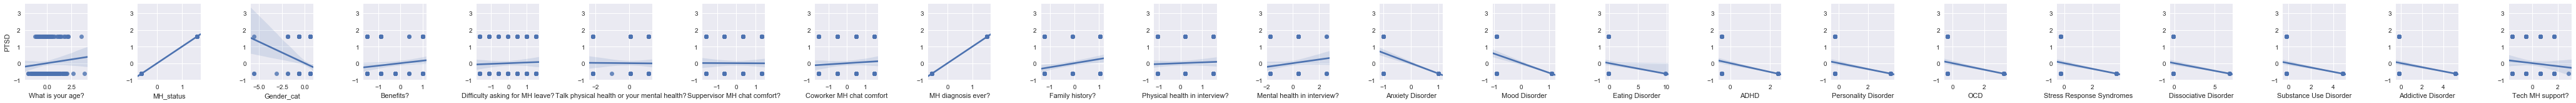

In [220]:
sns.set(font_scale=1)
sns.pairplot(final_unsuper_scaled, x_vars = ['What is your age?', 'MH_status', 'Gender_cat', 'Benefits?',
       'Difficulty asking for MH leave?',
       'Talk physical health or your mental health?',
       'Suppervisor MH chat comfort?', 'Coworker MH chat comfort',
       'MH diagnosis ever?', 'Family history?',
       'Physical health in interview?', 'Mental health in interview?',
       'Anxiety Disorder', 'Mood Disorder', 'Eating Disorder', 'ADHD',
       'Personality Disorder', 'OCD', 'Stress Response Syndromes',
       'Dissociative Disorder', 'Substance Use Disorder',
       'Addictive Disorder', 'Tech MH support?'], y_vars = ['PTSD'], kind = "reg")

In [259]:
mh_count = final_unsuper[mh].apply(pd.value_counts)
mh_values = mh_count.values
mh_names = mh_count.columns
mh_count

Anxiety Disorder  Mood Disorder  Eating Disorder  ADHD  Personality Disorder  OCD  PTSD  Stress Response Syndromes  Dissociative Disorder  Substance Use Disorder  Addictive Disorder
0                98            106              192   165                   180  177   139                        181                    190                     186                 187
1                96             88                2    29                    14   17    55                         13                      4                       8                   7

In [308]:
def perc(data):
    x = data.values[0]
    y = data.values[1]
    no =  x/(x+y)
    yes = y/(x+y)
    return no, yes
mh_perc = mh_count.apply(perc)
mh_perc = pd.DataFrame(data=mh_perc)
#mh_perc = mh_perc.T
mh_perc

0
Anxiety Disorder            (0.505154639175, 0.494845360825)
Mood Disorder               (0.546391752577, 0.453608247423)
Eating Disorder            (0.989690721649, 0.0103092783505)
ADHD                        (0.850515463918, 0.149484536082)
Personality Disorder       (0.927835051546, 0.0721649484536)
OCD                        (0.912371134021, 0.0876288659794)
PTSD                        (0.716494845361, 0.283505154639)
Stress Response Syndromes  (0.932989690722, 0.0670103092784)
Dissociative Disorder       (0.979381443299, 0.020618556701)
Substance Use Disorder     (0.958762886598, 0.0412371134021)
Addictive Disorder         (0.963917525773, 0.0360824742268)

In [315]:
mh_perc_split = pd.DataFrame(mh_perc[0].tolist(), columns=['no', 'yes'], index = mh_perc.index)
mh_perc_split

no       yes
Anxiety Disorder           0.505155  0.494845
Mood Disorder              0.546392  0.453608
Eating Disorder            0.989691  0.010309
ADHD                       0.850515  0.149485
Personality Disorder       0.927835  0.072165
OCD                        0.912371  0.087629
PTSD                       0.716495  0.283505
Stress Response Syndromes  0.932990  0.067010
Dissociative Disorder      0.979381  0.020619
Substance Use Disorder     0.958763  0.041237
Addictive Disorder         0.963918  0.036082

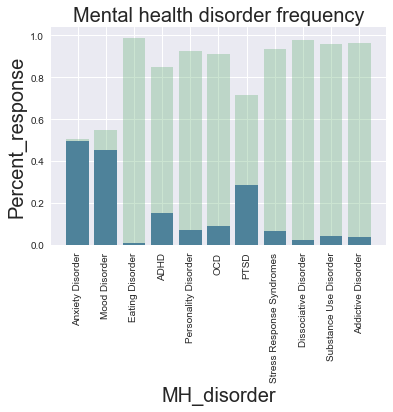

In [329]:
index = np.arange(len(mh_names))
plt.bar(index, mh_perc_split['yes'])
plt.bar(index, mh_perc_split['no'], alpha = .3)
plt.xlabel('MH_disorder', fontsize=20)
plt.ylabel('Percent_response', fontsize=20)
plt.xticks(index, mh_names, fontsize=10, rotation=90)
plt.title('Mental health disorder frequency', fontsize=20)
plt.figure(figsize=(90,30))
plt.show()

In [330]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from itertools import chain
import scipy.stats as stats

In [331]:
pca = PCA()
transformed_pca_x = pca.fit_transform(final_unsuper)
#create component indices
component_names = ["component_"+str(comp) for comp in range(1, len(pca.explained_variance_)+1)]

#generate new component dataframe
transformed_pca_x = pd.DataFrame(transformed_pca_x,columns=component_names)
print(final_unsuper.head())
transformed_pca_x.head()

    What is your age?  MH_status  Gender_cat  Benefits?  Difficulty asking for MH leave?  Talk physical health or your mental health?  Suppervisor MH chat comfort?  Coworker MH chat comfort  MH diagnosis ever?  Family history?  Physical health in interview?  Mental health in interview?  Anxiety Disorder  Mood Disorder  Eating Disorder  ADHD  Personality Disorder  OCD  PTSD  Stress Response Syndromes  Dissociative Disorder  Substance Use Disorder  Addictive Disorder  Tech MH support?  Age?
0                27.0          2           4          2                                2                                            3                             3                         3                   0                1                              2                            1                 1              0                0     0                     0    0     0                          0                      0                       0                   0               1.0  27.0
1           

component_1  component_2  component_3  component_4  component_5  component_6  component_7  component_8  component_9  component_10  component_11  component_12  component_13  component_14  component_15  component_16  component_17  component_18  component_19  component_20  component_21  component_22  component_23  component_24  component_25
0   -10.677818     0.149732     0.509716    -0.296981     2.910632     0.339038     0.406733     0.879629     0.278530      0.014873      0.030166     -0.093392     -0.711600     -0.016022      0.009352     -0.214317      0.038282     -0.132384     -0.049872     -0.038527     -0.140775     -0.025128  8.832585e-15 -6.067224e-16  6.651994e-17
1    -4.991150    -0.326258     1.889435    -0.814723     1.074667     0.207206     0.079901     1.014138    -0.879483      1.454082      0.421641      0.179175      0.705181      0.057782      0.192521     -0.167751      0.081406     -0.009319      0.071925      0.050112      0.003990      0.014269 -7.367326e-15  1.288124e-15  1.952186e-16
2     2.142599     4.807289    -0.350945    -0.055964    -1.079535    -0.486589     0.049131    -0.749489     0.012480      0.147186     -0.271122      0.229480     -0.217705      1.001581      0.104615     -0.458875     -0.118704      0.123830     -0.148355      0.026484      0.012775      0.003329  2.379991e-15 -7.660510e-17  1.918323e-18
3     0.687995     2.318820     0.572957     1.509264     1.672966    -0.248867    -0.762424    -0.100567    -0.686427      0.491879      0.241526     -0.057935     -0.209741     -0.089764     -0.041387      0.176872      0.069133     -0.083661      0.010698     -0.008751     -0.013200     -0.024641  1.325245e-16  1.758407e-16 -2.320316e-17
4    -0.854668    -2.076860    -2.196509     2.451462     0.251264     0.049639     0.275244     0.254488    -0.554694      1.624435      0.555141      0.009790     -0.160135     -0.007269     -0.045907      0.212896      0.002975     -0.041088      0.051284      0.057988     -0.019330      0.013515  8.980625e-16  6.715385e-17 -2.483826e-17

Text(0,0.5,'eigenvalue')

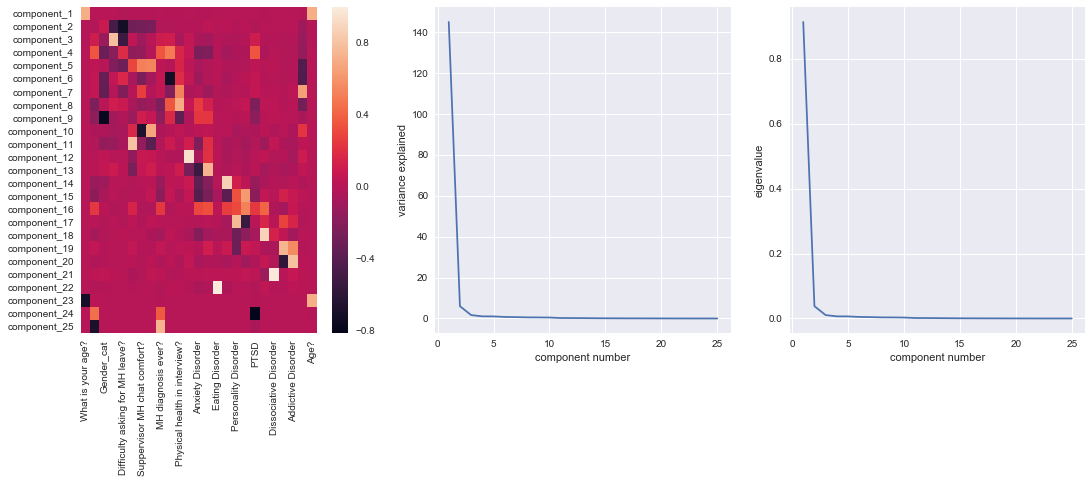

In [332]:
#generate component loadings on original features
component_matrix = pd.DataFrame(pca.components_,index=component_names,columns = final_unsuper.columns)
#add additional columns to describe what
component_matrix["explained_variance_ratio"] = pca.explained_variance_ratio_
component_matrix["eigenvalue"] = pca.explained_variance_
figure = plt.figure(figsize=(18,6))
#add 3 subplots one at a time

#first the component matrix
figure.add_subplot(131)
sns.heatmap(component_matrix.iloc[:,:-2])

#then the eigenvalues
figure.add_subplot(132)
plt.plot(range(1,component_matrix.shape[0]+1), component_matrix.eigenvalue)
plt.xlabel("component number")
plt.ylabel("variance explained")

#then the explained variance ratio
figure.add_subplot(133)
plt.plot(range(1,component_matrix.shape[0]+1), component_matrix.explained_variance_ratio)
plt.xlabel("component number")
plt.ylabel("eigenvalue")

In [333]:
component_matrix.explained_variance_ratio.cumsum()

component_1     0.913366
component_2     0.951226
component_3     0.961681
component_4     0.968209
component_5     0.974572
component_6     0.979345
component_7     0.983530
component_8     0.986913
component_9     0.990155
component_10    0.993076
component_11    0.994506
component_12    0.995845
component_13    0.996913
component_14    0.997702
component_15    0.998262
component_16    0.998743
component_17    0.999103
component_18    0.999437
component_19    0.999677
component_20    0.999835
component_21    0.999942
component_22    1.000000
component_23    1.000000
component_24    1.000000
component_25    1.000000
Name: explained_variance_ratio, dtype: float64

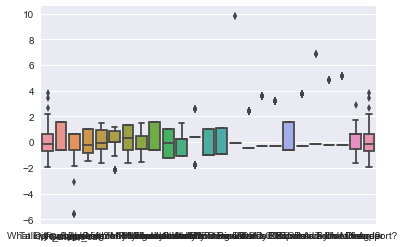

In [237]:
sns.boxplot(data=final_unsuper_scaled)

In [229]:
curr_mh = final_unsuper[mh].apply(pd.value_counts)
sns.barplot(curr_mh.index, curr_mh.values[1],  alpha=0.9)
plt.title('Current mental health status')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.show()

ValueError: Grouper and axis must be same length

In [ ]:
mh_by_size= surveyData_cat.groupby('How many employees does your company or organization have?')['Do you currently have a mental health disorder?'].value_counts(normalize=True)
sns.barplot(mh_by_size.index, mh_by_size.values,  alpha=0.9)
plt.title('Current mental health status across company sizes')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
mh_by_options= surveyData_cat.groupby('Do you currently have a mental health disorder?')['Do you know the options for mental health care available under your employer-provided health coverage?'].value_counts(normalize=True)
sns.barplot(mh_by_options.index, mh_by_options.values,  alpha=0.9, order = answers)
plt.title('Mental health status and knowledge of mental health options')
plt.ylabel('% of respondents', fontsize=12)
plt.xlabel('Answer', fontsize=12)
plt.xticks(rotation=90)
mental = surveyData_cat['Do you currently have a mental health disorder?'].unique()
options = surveyData_cat['Do you know the options for mental health care available under your employer-provided health coverage?'].unique()
options = options[0:2]
mental = [mental[1], mental[2]]
answers = ((mental[0], options[0]), (mental[0], options[1]), (mental[1], options[0]), (mental[1], options[1]))
plt.show()

In [ ]:
willingness = surveyData.groupby('Do you currently have a mental health disorder?')['How willing would you be to share with friends and family that you have a mental illness?'].median()
sns.barplot(willingness.index, willingness.values,  alpha=0.9, order = ['Yes', 'No', 'Possibly', 'Don\'t know'])
plt.title('Willingness to share across mental health status')
plt.ylabel('Median willingenss', fontsize=12)
plt.xlabel('Do you currently have a mental health disorder?', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
surveyData_cont_clean = surveyData[['Org_size', 'Gender_cat', 'What is your age?', 'Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?', 'How willing would you be to share with friends and family that you have a mental illness?', 'Overall, how well do you think the tech industry supports employees with mental health issues?', 'MH_status']]
surveyData_cont_clean['How willing would you be to share with friends and family that you have a mental illness?'].unique()


In [ ]:
sns.regplot(y="MH_status", x="What is your age?", data=surveyData_final)

In [ ]:
sns.regplot(y="MH_status", x="Gender_cat", data=surveyData_final)

In [ ]:
#sns.regplot(y="MH_status", x="Org_size", data=surveyData_final)
sns.regplot(y="MH_status", x="Org_size", data=surveyData_final,  x_estimator=np.mean)

In [ ]:
#sns.regplot(y="MH_status", x="Org_size", data=surveyData_final)
sns.regplot(y="MH_status", x="Overall, how well do you think the tech industry supports employees with mental health issues?", data=surveyData_final,  x_estimator=np.mean)

In [ ]:
auto_correlations = surveyData_short.corr()
auto_correlations

In [ ]:
sns.heatmap(auto_correlations)

In [ ]:
sns.set(font_scale=3)
sns.pairplot(surveyData_short, x_vars = ['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support'], y_vars = ['MH_status'], kind = "reg", size=6, aspect=0.8)

In [ ]:
sns.set(font_scale=2)
sns.pairplot(surveyData_short, hue = 'MH_status', diag_kind = 'kde', kind = 'reg')

In [ ]:
X = surveyData_short[['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support']]
y = surveyData_short.MH_status

In [ ]:
# fit a linear regression model and store the predictions
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
# Instantiate and fit the Linear regression object
linreg = LinearRegression()
linreg.fit(X, y)
# predict outcomes
outcome_pred = linreg.predict(X)

In [ ]:
y_pred = linreg.predict(X)
metrics.r2_score(y, y_pred)

In [ ]:
mae = metrics.mean_absolute_error(y_pred, y)
mse = metrics.mean_squared_error(y_pred, y)
rmse = np.sqrt(mse)
print('model with one feature:')
print('mae: ', mae, 'mse: ', mse, 'rmse: ', rmse)

In [ ]:
# fit a linear regression model and store the predictions
feature_cols = ['Org_size', 'Age', 'Gender_cat', 'Emp_PH', 'Emp_MH', 'Willingness', 'Emp_type', 'Role', 'Tech_support']
X_mult = surveyData_short[feature_cols]
y_mult = surveyData_short.MH_status

# Instantiate and fit the Linear regression object
linreg_m = LinearRegression()
linreg_m.fit(X_mult, y_mult)

# predict outcomes
outcome_pred_m = linreg_m.predict(X_mult)

In [ ]:
y_pred_mult = linreg_m.predict(X_mult)
metrics.r2_score(y_mult, y_pred_mult)

In [ ]:
mae_m = metrics.mean_absolute_error(y_pred_mult, y)
mse_m = metrics.mean_squared_error(y_pred_mult, y)
rmse_m = np.sqrt(mse_m)
print('model with all feature:')
print('mae: ', mae_m, 'mse: ', mse_m, 'rmse: ', rmse_m)

In [ ]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred, color='red')

In [ ]:
outcome_pred

In [ ]:
# transform predictions to 1 or 0
outcome_pred_class = np.where(outcome_pred >= 1.5, 3, 0)
outcome_pred_class

In [ ]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred_class, color='red')

In [ ]:
# add predicted class to DataFrame
surveyData_short['outcome_pred_class'] = outcome_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
surveyData_short.sort_values('Age', inplace=True)

In [ ]:
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, surveyData_short.outcome_pred_class, color='red')

In [ ]:
# create logistic regression object
logreg = LogisticRegression(C=1e9)
# create X and y
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
#fit the model
logreg.fit(X, y)
# create predictions
outcome_pred_class_log = logreg.predict(X)

In [ ]:
# print the class predictions
outcome_pred_class_log

In [ ]:
# plot the class predictions
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_pred_class_log, color='red')

In [ ]:
# store the predicted probabilites of class 1 only
outcome_probs = logreg.predict_proba(X)[:, 1]
outcome_probs

In [ ]:
# plot the predicted probabilities, and the 50% line
plt.scatter(surveyData_short.Age, surveyData_short.MH_status)
plt.plot(surveyData_short.Age, outcome_probs, color='red')
plt.plot(surveyData_short.Age, np.ones(outcome_probs.shape)*1.5,'k--')

In [ ]:
# create logistic regression object
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
# create X and y
feature_cols = ['Age']
X = surveyData_short[feature_cols]
y = surveyData_short.MH_status
#fit the model
mul_lr.fit(X, y)
outcome_pred_class_log_mul = mul_lr.predict(X)

In [ ]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

In [ ]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class_log
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

In [ ]:
y = surveyData_short.MH_status
y_pred = outcome_pred_class_log_mul
print("Model accuracy:",metrics.accuracy_score(y,y_pred))

In [ ]:
surveyData_short.head()

In [ ]:
feature_cols = ['Age', 'Org_size']
X = surveyData_short.drop(['MH_status', 'outcome_pred_class'], axis=1)
y = surveyData_short.MH_status

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
logreg.coef_

In [ ]:
outcome_predictions = logreg.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, outcome_predictions))

In [ ]:
feature_cols = ['Age', 'Org_size']
X = surveyData_short.drop(['outcome_pred_class', 'MH_status'], axis=1)
y = surveyData_short.MH_status

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)


logreg_mult = LogisticRegression(multi_class='multinomial', solver='newton-cg')
logreg_mult.fit(X_train, y_train)

In [ ]:
logreg_mult.coef_

In [ ]:
outcome_predictions = logreg_mult.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(y_test, outcome_predictions))

Decision Trees


In [ ]:
X = surveyData_short.drop(['outcome_pred_class', 'MH_status'], axis=1)
y = surveyData_short.MH_status

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.4,random_state=20)

decision_tree = DecisionTreeRegressor(max_depth=2)
decision_tree.fit(X_train,y_train)
print("Decision Tree RMSE:",np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test))))

In [ ]:
depths = range(1,11)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth,random_state=10)
    decision_tree.fit(X_train,y_train)
    curr_train_rmse = np.sqrt(mean_squared_error(y_train,decision_tree.predict(X_train)))
    curr_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test)))
    print("Decision Tree Train/Test RMSE:",curr_train_rmse," ",curr_test_rmse)
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
plt.plot(depths,train_rmse,label='train_rmse')
plt.plot(depths,test_rmse,label='test_rmse')
plt.xlabel("maximum tree depth")
plt.ylabel("rmse - lower is better")
plt.legend()

In [ ]:
# max_depth=2 was best, so fit a tree using that parameter
best_single_tree = DecisionTreeRegressor(max_depth=1, random_state=1)
best_single_tree.fit(X_train, y_train)

In [ ]:
pd.DataFrame({'feature': list(X), 'importance':best_single_tree.feature_importances_})

In [ ]:
# use fitted model to make predictions on testing data
y_pred = best_single_tree.predict(X_test)
y_pred

In [ ]:
# calculate test set RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# fit a classification tree with max_depth=3 on all of the training data
from sklearn.tree import DecisionTreeClassifier
occupancy_tree = DecisionTreeClassifier(max_depth=2, random_state=1)
occupancy_tree.fit(X_train, y_train)

In [ ]:
print( accuracy_score(y_test,occupancy_tree.predict(X_test)))
1- (float(y_train.sum())/y_train.shape[0])

In [ ]:
# compute the feature importances
pd.DataFrame({'feature':list(X), 'importance':occupancy_tree.feature_importances_})

Bootstrapping

In [ ]:
# set a seed for reproducibility
np.random.seed(1234)

# create ten bootstrap samples (will be used to select rows from the DataFrame)

samples = [np.random.choice(a=X_train.shape[0], size=X_train.shape[0], replace=True) for _ in range(1, 11)]
samples

In [ ]:
# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# list for storing predicted compressive strength from each tree
predictions = []

# define testing data
X_test_boot = X_test
y_test_boot = y_test

# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train_boot = X_train.iloc[sample, :]
    y_train_boot = y_train.iloc[sample]
    treereg.fit(X_train_boot, y_train_boot)
    y_pred_boot = treereg.predict(X_test_boot)
    predictions.append(y_pred_boot)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions.shape

In [ ]:
# average the predictions
np.mean(predictions, axis=0)

In [ ]:
# calculate RMSE for bagged regression trees
y_pred_boot = np.mean(predictions, axis=0)
print("Bagged RMSE:",np.sqrt(mean_squared_error(y_test_boot, y_pred_boot)))

#calculate RMSE for single decision tree with same exact parameters as each tree in the bag
single_tree = DecisionTreeRegressor(max_depth=None, random_state=123)
single_tree.fit(X_train,y_train)
y_pred_single = single_tree.predict(X_test)
print("Single Tree RMSE:",np.sqrt(mean_squared_error(y_test_boot, y_pred_single)))

In [ ]:
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=1234)
# fit and predict
bagreg.fit(X_train, y_train)
y_pred_bag = bagreg.predict(X_test)
y_pred_bag

In [ ]:
# calculate RMSE
print("Bagged RMSE with 500 trees:",np.sqrt(mean_squared_error(y_test, y_pred_bag)))

In [ ]:
# compute the out-of-bag R-squared score (not MSE, unfortunately!) for b=500
bagreg.oob_score_

In [ ]:
#Single Tree
best_single_tree = DecisionTreeRegressor(max_depth=3, random_state=123)
best_single_tree.fit(X_train, y_train)
y_pred_single = best_single_tree.predict(X_test)

#Bag of 500 trees
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
bagreg.fit(X_train, y_train)
y_pred_bag = bagreg.predict(X_test)

#Random forest of 500 trees
rf = RandomForestRegressor(n_estimators=500, bootstrap=True, oob_score=True, random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Single Tree RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_single)))
print("Bag RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_bag)))
print("Random Forest RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

In [ ]:
# list of values to try for n_estimators
estimator_range = range(20, 500, 20)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=1)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

In [ ]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

In [ ]:
# list of values to try for max_features
feature_range = range(1, len(list(X))+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=400, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=1234)
    rfreg.fit(X_train,y_train)
    preds = rfreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    RMSE_scores.append(rmse)

In [ ]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

In [ ]:
rfreg_best = RandomForestRegressor(n_estimators=500, max_features=1, bootstrap=True, oob_score=True, random_state=123)
rfreg_best.fit(X_train,y_train)
preds = rfreg_best.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("Best RMSE:",rmse)

In [ ]:
# compute feature importances
pd.DataFrame({'feature':list(X), 'importance':rfreg_best.feature_importances_})

In [ ]:
X_train.head()